In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


In [13]:
import dill
from pathlib import Path
def dill_load(path:Path):
    with open(path, 'rb') as f:
        ret = dill.load(f)
    return ret

def load_mapping(saved_path:Path, device:str)->plt.Figure:
    with open(saved_path/f'naive({device})/balanced/qasvm', 'rb') as f:
        layout = dill.load(f).quantum_instance.compile_config['initial_layout']

    fig = layout.plot('physical')
    #fig.set_figwidth(10)
    #fig.set_figheight(6)
    fig.tight_layout()
    return fig

saved_path = Path('/home/quic/QUIC-Projects/summary_ipynb/2021/06 June/03 Thu')


In [3]:
result_dict = {'montreal': {'balanced':{}, 'unbalanced':{}}, 'toronto':{'balanced':{}, 'unbalanced':{}}}
for device in result_dict.keys():
    for dist in result_dict[device].keys():
        loc = saved_path/f'naive({device})'/dist
        temp = dict()
        temp['real'] = dill_load(loc/'storage')
        temp['sim'] = dill_load(loc/'sim_storage')
        result_dict[device][dist] = temp

In [4]:
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.fontsize']= 'medium'
plt.rcParams['lines.markersize'] = 8

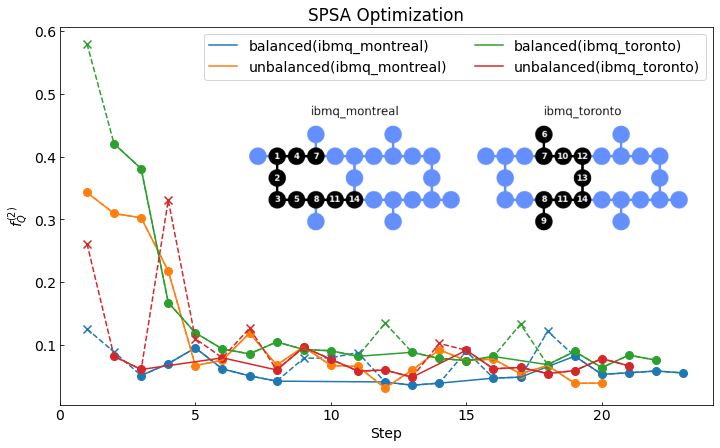

In [80]:
import matplotlib.colors as mcolor
fig, ax = plt.subplots(1, 1, sharex=False, sharey=True, squeeze=True, figsize=(10, 6))
fig.tight_layout()
devices = ['montreal', 'toronto']
dists = ['balanced', 'unbalanced']
colors = list(mcolor.TABLEAU_COLORS.values())
colors.reverse()
for i, device in enumerate(devices):
    for j, dist in enumerate(dists):
        for k, real in enumerate(['real']):
            storage = result_dict[device][dist][real]
            data = storage.data
            ind = data['Accepted']==True
            color = colors.pop()
            ax.plot(data['Step'], data['Cost'], linestyle='--', color=color)
            ax.plot(data[ind]['Step'], data[ind]['Cost'], linestyle='-', color=color, label=f'{dist}(ibmq_{device})')
            ax.scatter(data[ind]['Step'], data[ind]['Cost'], marker='o', color=color)
            ax.scatter(data[~ind]['Step'], data[~ind]['Cost'], marker='x', color=color)
ax.legend(ncol=2)
ax.set_title('SPSA Optimization')
ax.set_ylabel(r'$f^{(2)}_Q$')
ax.set_xlabel('Step')
ax.set_xlim([0, None])
subaxes = [ax.inset_axes([.25, .4, .4, .4]), ax.inset_axes([.6, .4, .4, .4])]
for i, device in enumerate(devices):
    devfig = load_mapping(saved_path, device)
    devfig.set_figwidth(5)
    devfig.set_figheight(3)
    devfig.tight_layout()
    devfig.suptitle(f'ibmq_{device}')
    devfig.savefig(f'./{device}.png')
    im = plt.imread(f'./{device}.png')
    subaxes[i].imshow(im)
    subaxes[i].axis('off')







In [63]:
fig.get_figheight()

6.0